# 1. Bisection


One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower, upper, tol)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [ ]:
# ref : https://www.youtube.com/watch?v=QcuVPbN4_Vk&ab_channel=AndrewDotson

In [ ]:
import numpy as np
def bisect(f, lower, upper, tol):
    lower = lower
    upper = upper
    while (np.abs(lower-upper)>=tol):
        mid = ((lower+upper)/2)
        target = f(lower)*f(mid)
        if target > 0:
            lower = mid
        else:
            if target < tol:
                upper = mid
    return mid

result = bisect(lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1,0.3,1,1e-5)
print(result)

# 1.2 (stretch) Recursive Bisect

Write a recursive version of the bisection algorithm

# 2.1 Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out

2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.

3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
sns.set()

# drop features
df = pd.read_csv('data/movies_metadata.csv')

df = df.drop(['belongs_to_collection','homepage','tagline','imdb_id','overview',
              'poster_path','original_title','adult','popularity','release_date',
              'production_companies','spoken_languages','video','status'],axis=1)
df.dropna(inplace=True)
print(df.shape)

# set types to variables
df.id = df.id.astype('int')
df.budget = df.budget.astype('float')

# clean data
df = df[(df.budget > 0) & (df.revenue > 0) & (df.runtime > 0)]
df = df.reset_index(drop=True)

# feature engineering
df['return'] = df.revenue - df.budget
print(df.vote_count.describe())
df['vote_weight'] = (df.vote_count/(df.vote_count+2_500)) * df.vote_average + (2_500/(df.vote_count+2_000)) * (df.vote_average.mean())

df.iloc[[df['vote_weight'].argmax()]]

(45192, 10)
count     5369.000000
mean       733.894766
std       1252.467976
min          0.000000
25%         77.000000
50%        277.000000
75%        804.000000
max      14075.000000
Name: vote_count, dtype: float64


C:\Users\gayar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,budget,genres,id,original_language,production_countries,revenue,runtime,title,vote_average,vote_count,return,vote_weight
122,25000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",278,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",28341469.0,142.0,The Shawshank Redemption,8.5,8358.0,3341469.0,8.057579


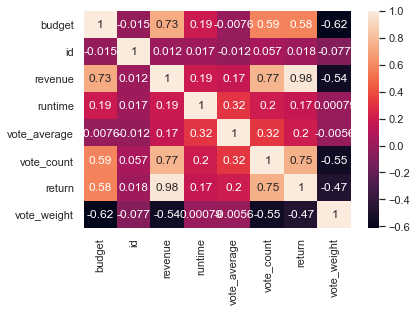

In [4]:
correlation_matrix = df.corr()
correlation_matrix[correlation_matrix > 0.5]
sns.heatmap(data=correlation_matrix.iloc[0:12,0:12], annot=True)

In [5]:
(np.abs(correlation_matrix['return'])).sort_values(ascending=False)

return          1.000000
revenue         0.980478
vote_count      0.748571
budget          0.581458
vote_weight     0.469451
vote_average    0.201155
runtime         0.170521
id              0.018381
Name: return, dtype: float64

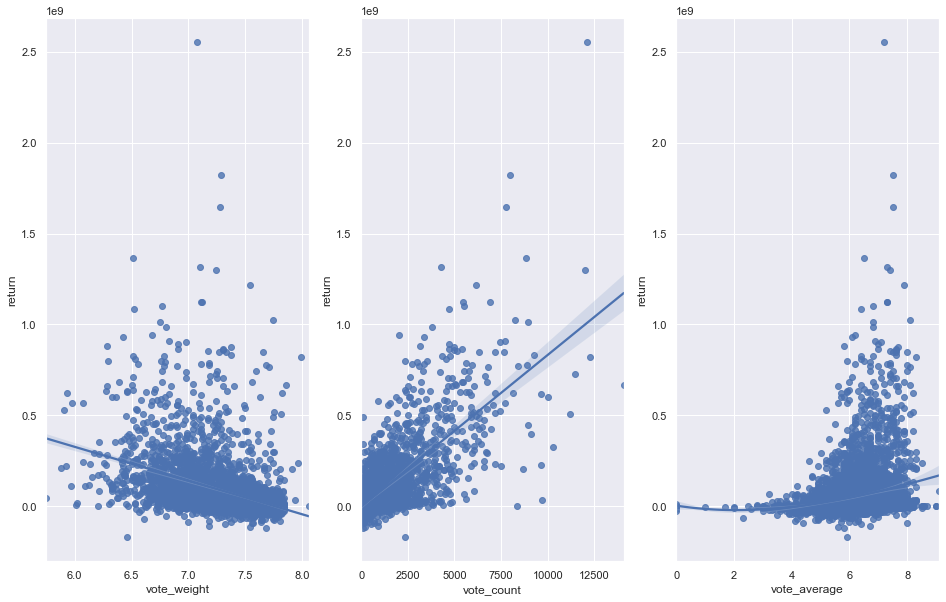

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize = (16, 10))

sns.regplot(data=df, x="vote_weight", y="return", ax = ax[0])
sns.regplot(data=df, x="vote_count", y="return", ax = ax[1])
sns.regplot(data=df, x="vote_average", y="return", ax = ax[2], order=3)

In [7]:
genres_dummies = (df.genres
                  .apply(eval)
                  .apply(lambda row : [d['name'] for d in row])
                  .astype(str)
                  .str.replace("[", "")
                  .str.replace("]", "")
                  .str.replace("'", "")
                  .str.strip()
                  .str.replace(" ", "")
                  .str.get_dummies(',')
                )

genres_dummies = genres_dummies.drop('Action',axis=1)

In [8]:
# regression model based on vote_count

x = df['vote_count']
X = sm.add_constant(x)
y = df['return']

results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     6841.
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:41:00   Log-Likelihood:            -1.0611e+05
No. Observations:                5369   AIC:                         2.122e+05
Df Residuals:                    5367   BIC:                         2.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.905e+06   1.46e+06     -1.300      0.1

In [9]:
# regression model with movie type

x_genres = genres_dummies
X_genres = sm.add_constant(x_genres)
y = df['return']

results = sm.OLS(y,X_genres).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     37.62
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          3.02e-130
Time:                        00:41:00   Log-Likelihood:            -1.0798e+05
No. Observations:                5369   AIC:                         2.160e+05
Df Residuals:                    5349   BIC:                         2.161e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            6.82e+07   5.05e+06     13.

# 2.2 Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [10]:
# linear least squares
from numpy.linalg import inv
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

[-1904968.68342387    83474.07083233]


# 2.3 Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [11]:
def Gradient(betas, y, x):
    res = np.sum( (np.dot(X, betas) - y) ** 2 )
    return res

In [12]:
from scipy.optimize import minimize

#create beta hat vector to maximize on
#will store the values of maximum likelihood beta parameters
#Arbitrarily initialized to all zeros
bhat = np.zeros(np.shape(X)[1])

#unvectorized MLE estimation
probit_est = minimize(Gradient, bhat, args=(y,x), method='nelder-mead')

#print vector of maximized betahats
probit_est['x']

array([-1904968.47612055,    83474.0705385 ])